In [9]:
from os import listdir
from matplotlib import image
import random
import numpy as np

# load all images in a directory
np.random.RandomState(10)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('C:/Users/Parzival/Desktop/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im21209.jpg (500, 490, 3)
> loaded im3113.jpg (335, 500, 3)
> loaded im13362.jpg (346, 500, 3)
> loaded im23489.jpg (375, 500, 3)
> loaded im6021.jpg (500, 333, 3)
> loaded im14253.jpg (500, 332, 3)
> loaded im17205.jpg (375, 500, 3)
> loaded im6941.jpg (375, 500, 3)
> loaded im24148.jpg (500, 450, 3)
> loaded im4682.jpg (500, 333, 3)
> loaded im9887.jpg (500, 500, 3)
> loaded im488.jpg (338, 500, 3)
> loaded im1691.jpg (500, 492, 3)
> loaded im3031.jpg (333, 500, 3)
> loaded im14406.jpg (500, 333, 3)
> loaded im21074.jpg (500, 375, 3)
> loaded im5950.jpg (500, 333, 3)
> loaded im23001.jpg (375, 500, 3)
> loaded im12158.jpg (500, 376, 3)
> loaded im14808.jpg (375, 500, 3)
> loaded im255.jpg (500, 500, 3)
> loaded im375.jpg (375, 500, 3)
> loaded im8939.jpg (500, 375, 3)
> loaded im20865.jpg (380, 500, 3)
> loaded im15493.jpg (333, 500, 3)
> loaded im13922.jpg (500, 334, 3)
> loaded im15184.jpg (375, 500, 3)
> loaded im6311.jpg (500, 333, 3)
> loaded im19564.jpg (500, 375, 3)
>

In [10]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [11]:
RED = 0
GREEN = 1
BLUE = 2
#2.a Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_blue, D_blue))

Red:	mat ochikuvannya - 115.58,	dispersiya - 6283.74
Green:	mat ochikuvannya - 109.54,	dispersiya - 5766.07
Blue:	mat ochikuvannya - 100.91,	dispersiya - 6421.59


In [12]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asimmetriya - 0.158,	Ekscess - -1.219
Green:	Asimmetriya - 0.246,	Ekscess - -1.089
Blue:	Asimmetriya - 0.408,	Ekscess - -1.126


In [13]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[ 1.15575697e+02  6.28374146e+03  1.58072830e-01 -1.21899738e+00]
 [ 1.09538250e+02  5.76606650e+03  2.45650349e-01 -1.08941043e+00]
 [ 1.00910682e+02  6.42158597e+03  4.08266865e-01 -1.12616585e+00]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [14]:
#4. Gaussian models

#a Mat ochikuvannya
P_x1 = np.random.normal(M_red, D_red, 1)
print("Mat ochikuvannya + colors:\n" + str(P_x1))

#b Mat ochikuvannya and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("Mat ochikuvannya + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Mat ochikuvannya, dispersion and asymetry
print("Mat ochikuvannya + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Mat ochikuvannya, dispersion, asymetry and ekscess
print("Mat ochikuvannya + dispersion + asymetry + ekscess + colors:\n" + str(P_x2[:4, :4]))

Mat ochikuvannya + colors:
[-6858.26926712]
Mat ochikuvannya + dispersion + colors:
[[6284.57158826 5278.83626067]
 [5278.83626067 5766.76462425]]
Mat ochikuvannya + dispersion + asymetry + colors:
[[6284.57158826 5278.83626067 4474.89778025]
 [5278.83626067 5766.76462425 5450.70037181]
 [4474.89778025 5450.70037181 6422.45749887]]
Mat ochikuvannya + dispersion + asymetry + ekscess + colors:
[[6284.57158826 5278.83626067 4474.89778025]
 [5278.83626067 5766.76462425 5450.70037181]
 [4474.89778025 5450.70037181 6422.45749887]]


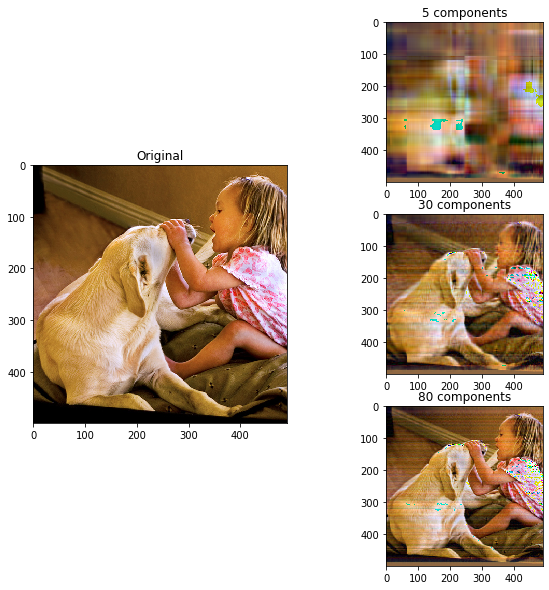

In [30]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[0]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[0])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

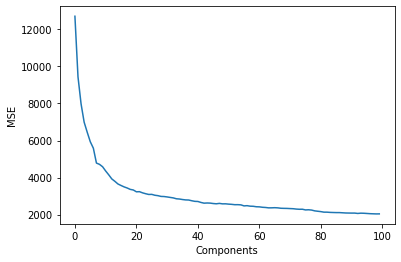

In [31]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [32]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.94446349 0.03479602 0.01114158 ... 0.         0.         0.        ]
 [0.33919844 0.36754643 0.11730205 ... 0.         0.         0.        ]
 [0.18711019 0.21413721 0.26819127 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.08056872 0.11848341 0.1563981 ]
 [0.         0.         0.         ... 0.08510638 0.09361702 0.23829787]
 [0.         0.         0.         ... 0.08723404 0.10425532 0.23829787]]

Red matrix 2nd order:
 [[9.06541664e-01 4.90474006e-02 1.83756711e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.78116559e-01 1.89894803e-01 9.20361217e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.17318265e-01 1.71764002e-01 1.21101232e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.56322462e-04 5.48534316e-06 9.54549143e-06 ... 5.17859298e-02
  5.95086946e-02 1.25515990e-01]
 [1.64482607e-04 7.90951515e-06 4.28531636e-06 ... 5.57664504e-02
  6.46908783e-02 1.36995164e-01]
 [1.561312

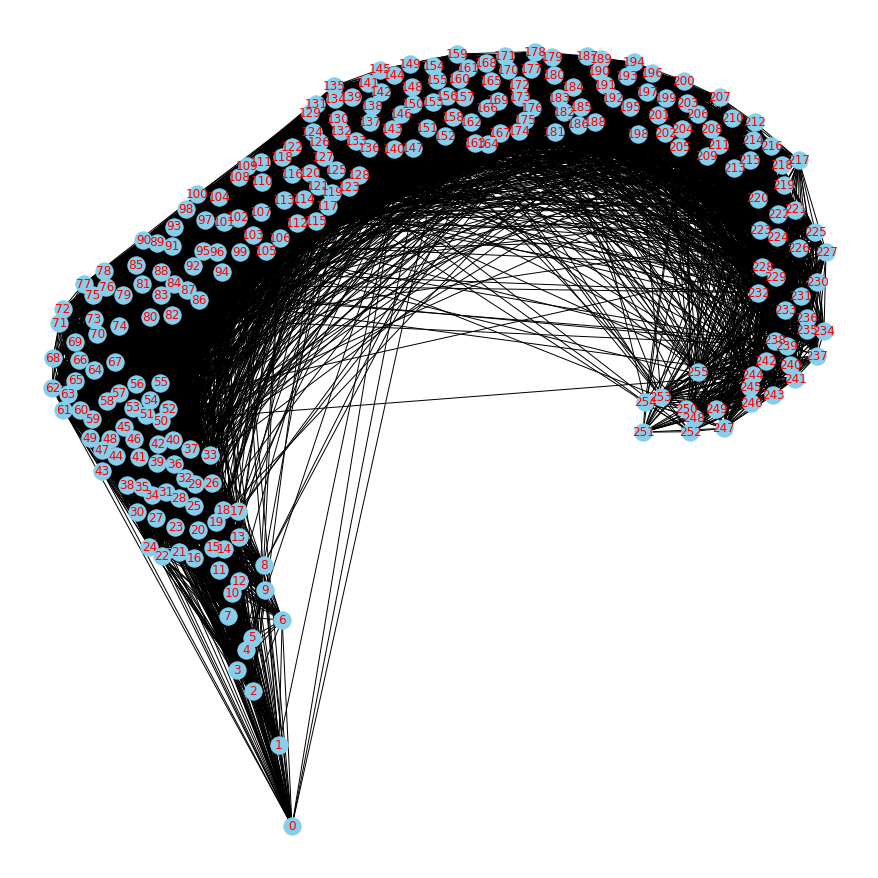

In [33]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='skyblue', font_color='red')
plt.show()